# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

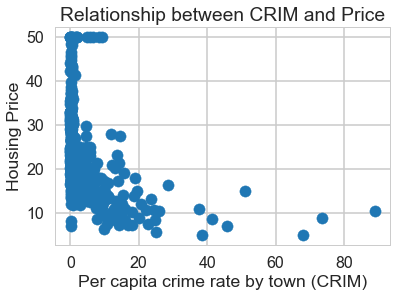

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")


Looking at the plot above, one would probably have second thoughts. It's certainly negative association because the slope declines, and also somewhat moderate in strength, however it could be difficult knowing if this is linear or non linear plot. One could draw a line through the clusters making it linear. It is also possible to draw a curved L shaped plot making it non linear.

The approach i use in cases like this is to use an odd number of tools or methodologies, and then take a vote. One with the highest vote count wins. This is not necessary for this exercise, but the votes go in the way of somewhat linear relationship. So, we have a somewhat moderate negative linear relationship between Hosuing Price and Per Capital Crime Rate by Town (CRIM)



In [13]:

# Calculates a Pearson correlation coefficient and the p-value 
stats.pearsonr(bos.CRIM,bos.PRICE)

(-0.3858316898839905, 2.0835501108141935e-19)


Describe the relationship between Crime and Housing Prices:

The scatter plot looks like a non-linear relationship, having a low correlation. Assessing the strength of a relationship just by looking at the scatterplot is difficult, and therefore we need to supplement the scatterplot with some kind of numerical measure that will help us assess the strength. After graphing a linear regression line of crime and prices, you see a negative correlation. I calculated the pearson correlation coefficient and p-value. The correlation coefficient is –0.39, which indicates the presence of a weak negative relationship. For -0.39 there is a statistically significant negative relationship between crime and housing prices(p < 1 × 10^-19), such that the probability of this correlation occurring by chance is less than one time out of 10^19.

Are there any outliers?

There are some outliers in the lower right of the plot, which gives us a false image of a negative linear relationship, when there is no linear relationship between crime and housing prices.

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [14]:
import seaborn as sns
%matplotlib inline


Creating scatter plots between RM and PRICE, and PTRATIO and PRICE. 

Text(0.5,1,'Relationship between RM and Price')

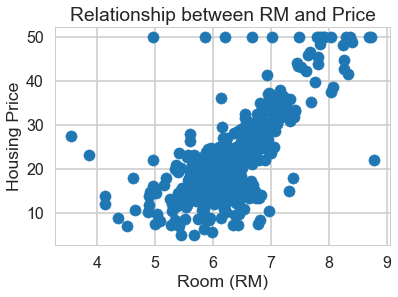

In [15]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Room (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")


C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


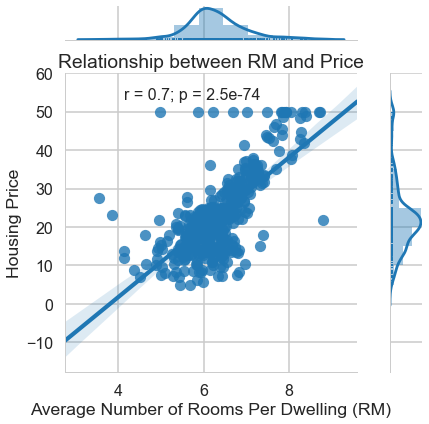

In [16]:
# scatter plot between RM (average number of rooms per dwelling) and PRICE

#plt.scatter(bos.RM, bos.PRICE)
#sns.lmplot(x='RM', y='PRICE', data=bos)
sns.jointplot(x='RM', y='PRICE', data=bos, kind="reg", space=1, marginal_kws=dict(bins=9,rug=True),annot_kws=dict(stat="r"))
plt.xlabel("Average Number of Rooms Per Dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

# Calculates a Pearson correlation coefficient and the p-value 
#stats.pearsonr(bos.RM,bos.PRICE)

Text(0.5,1,'Relationship between PTRATIO and Price')

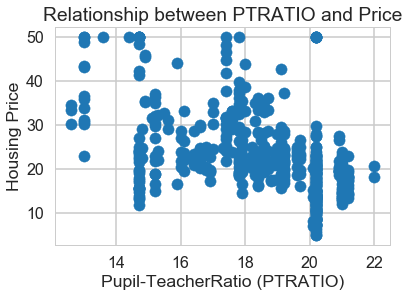

In [17]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-TeacherRatio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")



Housing Price has a moderate positive linear association with Average Number of Rooms per Dwelling such that overall, as the average of number of rooms per dweling increases, the housing price increases.

There is a moderate linear negative association between Housing Price and Pupil-Teacher Ratio by Town (PTRATIO). PTRATIO can be said to be categorical in nature.

C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


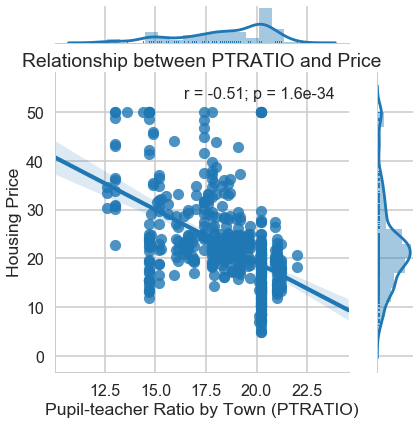

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
# scatter plot between PTRATIO (pupil-teacher ratio by town) and PRICE

#plt.scatter(bos.PTRATIO, bos.PRICE)
#sns.regplot(x='PTRATIO', y='PRICE', data=bos, fit_reg = True)
#sns.lmplot(x='PTRATIO', y='PRICE', data=bos)
sns.jointplot(x='PTRATIO', y='PRICE', data=bos, kind="reg", space=0.8, marginal_kws=dict(bins=15,rug=True),annot_kws=dict(stat="r"))
plt.xlabel("Pupil-teacher Ratio by Town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.show()

bos.describe()

Describe the relationship between Pupil-teacher ratio by town and Housing Prices:

The scatterplot looks as if there is no correlation between PTRATIO and PRICES. We get a correlation coefficient of -0.51 which indicates a negative linear relationship. The histogram of the residuals are skewed to the left, meaning that the mean is less than the median. From the descriptive statistics, the mean PTRATIO (18.5) is indeed less than the median PTRATIO (19.1). A left skewed distribution is sometimes called a negatively skewed distribution because it’s long tail is on the negative direction on a number line.

C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


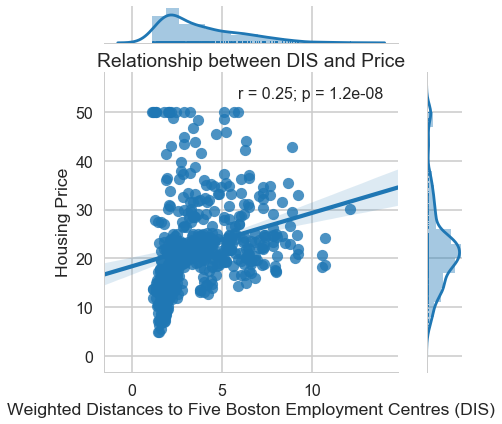

In [19]:
# Scatter plot between DIS (weighted distances to five Boston employment centres) and PRICE

#plt.scatter(bos.DIS, bos.PRICE)
#sns.regplot(x='DIS', y='PRICE', data=bos, fit_reg = True)
#sns.lmplot(x='DIS', y='PRICE', data=bos)
sns.jointplot(x='DIS', y='PRICE', data=bos, kind="reg", space=0.8, marginal_kws=dict(bins=15,rug=True),annot_kws=dict(stat="r"))
plt.xlabel("Weighted Distances to Five Boston Employment Centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")
plt.show()

he scatter plot for DIS and PRICE suggests there is a weak positive relationship between these variables. The histogram shows that the residuals are skewed to the right or positively skewed to the right. With a right skewed distribution, the mean is usually to the right of the median. According to the Mean of DIS (3.8) and median of DIS (3.2), this is true.



In [20]:
import seaborn as sns
%matplotlib inline

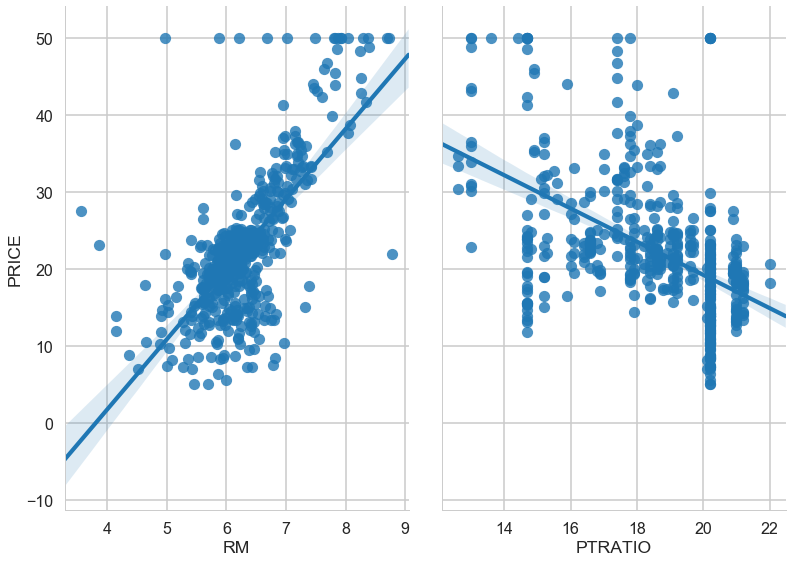

In [21]:
sns.pairplot(bos, x_vars=['RM', 'PTRATIO'], y_vars='PRICE', size=8, aspect=0.7, kind='reg')

# your turn: create some other scatter plots
# visualization

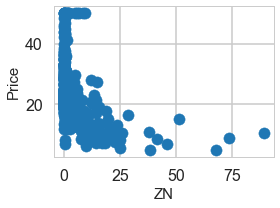

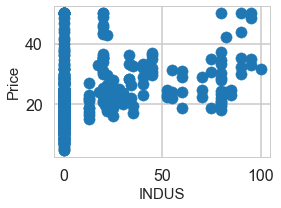

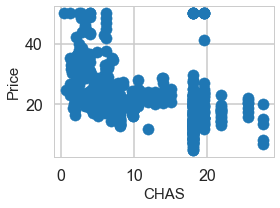

In [22]:

# Print the scatter plot for each (Column 1-4) feature with respect to price
for index, feature_name in enumerate(boston.feature_names[1:4]):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

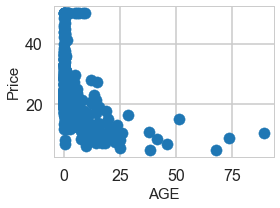

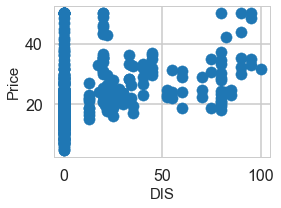

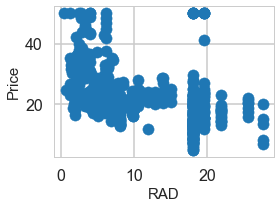

In [23]:
### visualization
# Print the scatter plot for each (Column 6-9) feature with respect to price
for index, feature_name in enumerate(boston.feature_names[6:9]):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

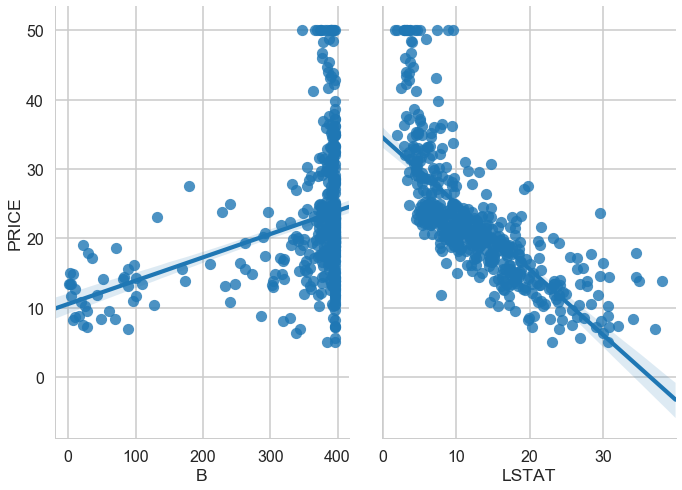

In [24]:
sns.pairplot(bos, x_vars=['B', 'LSTAT'], y_vars='PRICE', size=7, aspect=0.7, kind='reg')

Your turn: What are some other numeric variables of interest? Plot scatter plots with these variables and PRICE.

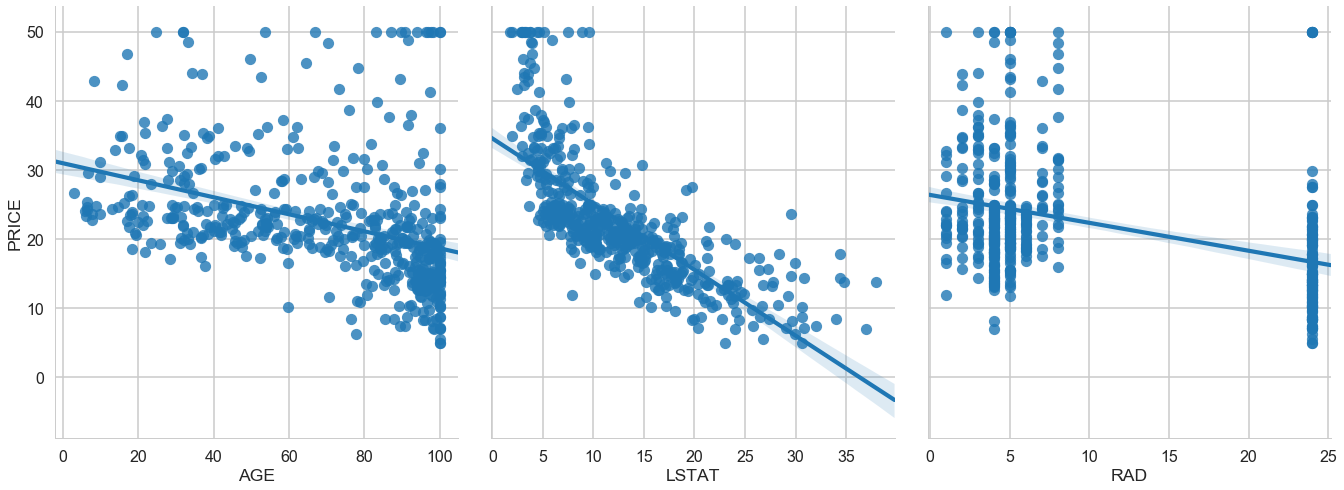

In [25]:
#your turn: create some other scatter plots
sns.pairplot(bos, x_vars=['AGE', 'LSTAT', 'RAD'], y_vars='PRICE', size=7, aspect=0.9, kind='reg')



Housing Price has a weak negative linear association with proportion of owner-occupied units built prior to 1940 such that overall, as proportion of owner-occupied units built prior to 1940 increases, the housing price slightly decreases.

Housing Price has a moderate negative linear association with percentage of lower status of the population such that overall, as percentage of lower status of the population increases, the housing price moderately decreases.

Housing Price has a weak negative linear association with index of accessibility to radial highways such that overall, as index of accessibility to radial highways increases, the housing price slightly decreases.


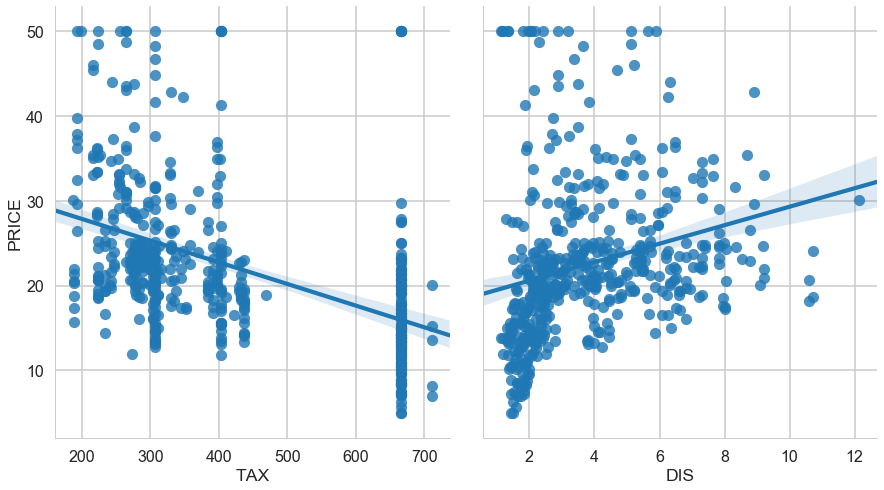

In [26]:

#your turn: create some other scatter plots
sns.pairplot(bos, x_vars=['TAX', 'DIS'], y_vars='PRICE', size=7, aspect=0.9, kind='reg')


Housing Price has a weak negative linear association with full-value property-tax rate per 10,000 Dollars such that overall, as full-value property-tax rate per 10,000 Dollars increases, the housing price slightly decreases.

Housing Price has a weak positive linear association with weighted distances to five Boston employment centres such that overall, as weighted distances to five Boston employment centres increases, the housing price slightly increases.

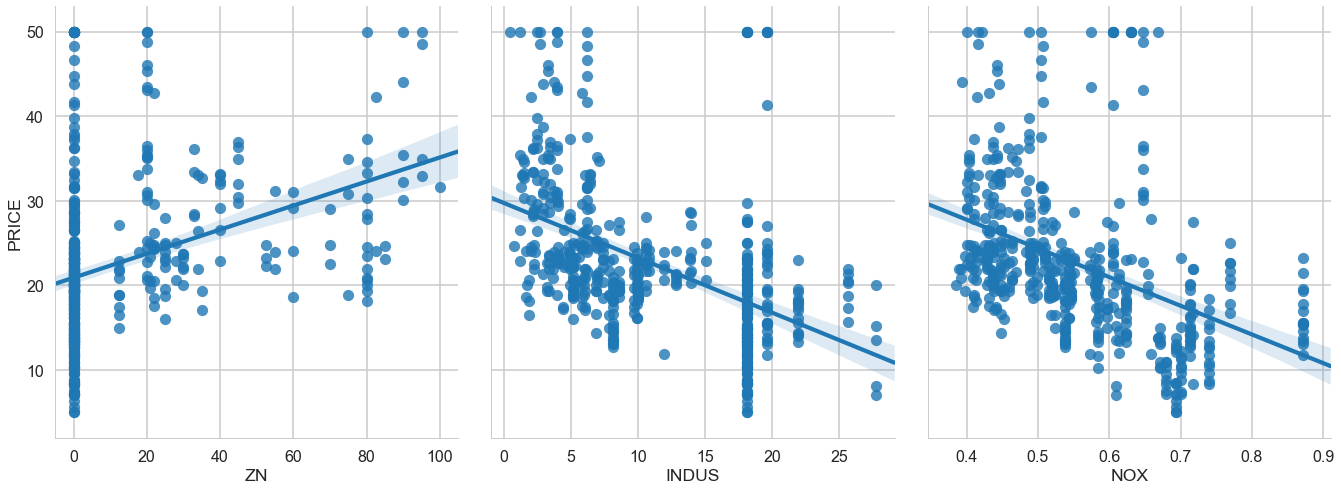

In [27]:
#your turn: create some other scatter plots
sns.pairplot(bos, x_vars=['ZN', 'INDUS', 'NOX'], y_vars='PRICE', size=7, aspect=0.9, kind='reg')

Housing Price has a weak positive linear association with proportion of residential land zoned for lots over 25,000 sq.ft. such that overall, as proportion of residential land zoned for lots over 25,000 sq.ft. increases, the housing price slightly increases.

Housing Price has a weak negative linear association with proportion of non-retail business acres per town such that overall, as proportion of non-retail business acres per town increases, the housing price moderately decreases.

Housing Price has a weak negative linear association with nitric oxides concentration (parts per 10 million) such that overall, as nitric oxides concentration (parts per 10 million) increases, the housing price slightly decreases.

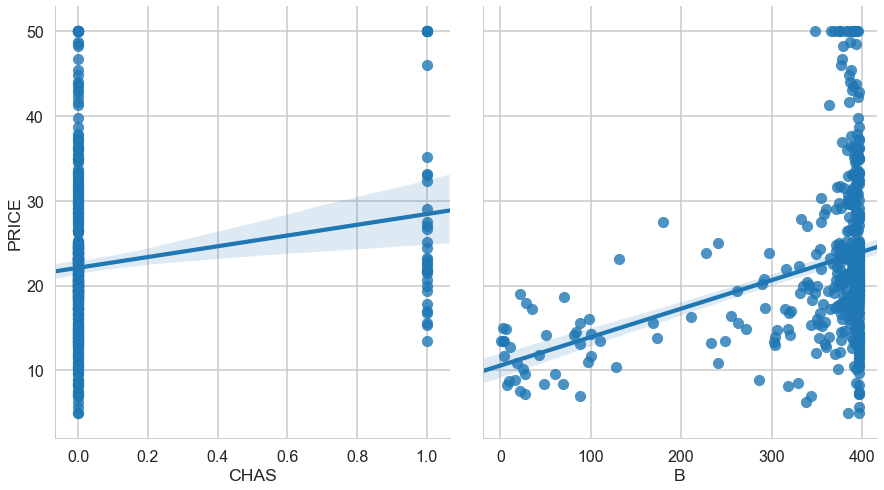

In [28]:
#your turn: create some other scatter plots
sns.pairplot(bos, x_vars=['CHAS', 'B'], y_vars='PRICE', size=7, aspect=0.9, kind='reg')

Housing Price has a weak positive linear association with Charles River dummy variable such that overall, as Charles River dummy variable increases, the housing price slightly increases.

Housing Price has a moderate positive linear association with portion of blacks by town such that overall, as portion of blacks by town increases, the housing price moderately increases.

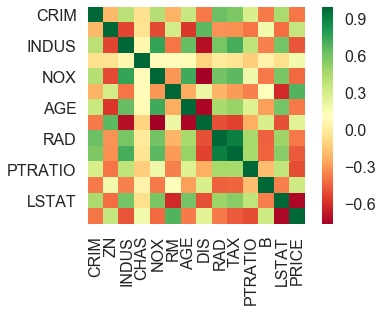

In [29]:
# your turn: create some other scatter plots
sns.heatmap(bos.corr(), square=True, cmap="RdYlGn")


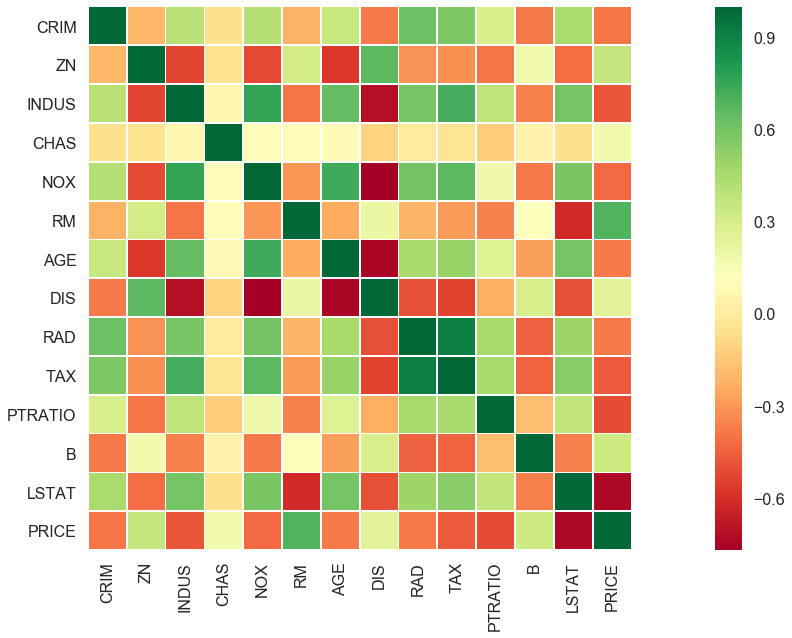

In [30]:
#Corelation Matrix

#sns.set(style="white")

df_corr= bos[:]
# Compute the correlation matrix
corr = df_corr.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdYlGn', square=True, linewidths=.7, ax=ax)

# RAD and TAX are highly co-related.
#Price negatively corelated with LSTAT(Strong),PTRATIO(Strong),TAX(high), INDUS(High), CRIM(Highly) and 
#NOX highly corelated with RM.
#Also Price positively corelated with RM(High), ZN(High), CHAS(Medium), DIS(MEDIUM) & B(Medium)


The above pairwise correlation heatmap suggests that there may also be a strong negative correlation between the % lower status of the population (LSTAT) and housing price as well as a strong positive correlation between the weighted distances to 5 Boston employment centres (DIS) and housing price.

In [31]:
#check missing values in the feature set
total_missing=bos.isnull().sum()

In [32]:

bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

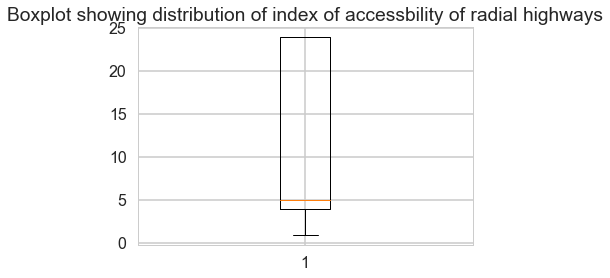

In [33]:

#creating boxplot to see the distribution median and outliers
plt.boxplot(bos['RAD'])
plt.title("Boxplot showing distribution of index of accessbility of radial highways")
plt.show()

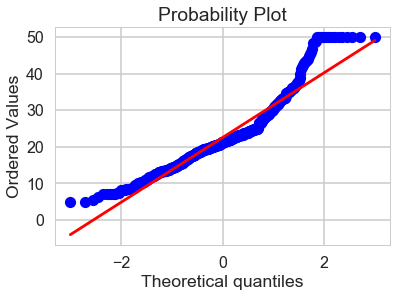

In [34]:

import pylab  #Plotting
import scipy.stats as stats # scintific calculation
stats.probplot(bos['PRICE'], dist="norm", plot=pylab)
pylab.show()

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

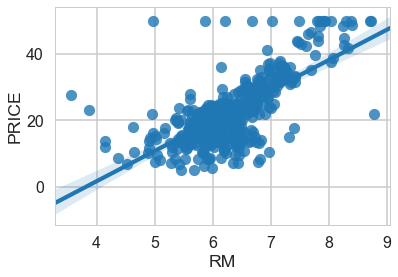

In [35]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


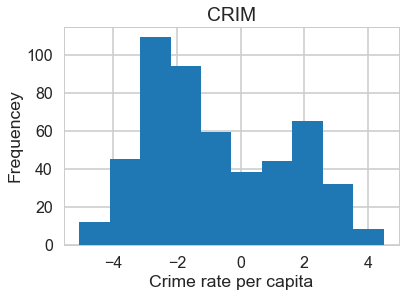

In [36]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

Histograms are a useful way to visually summarize the statistical properties of numeric variables. They can give you an idea of the mean and the spread of the variables as well as outliers.

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

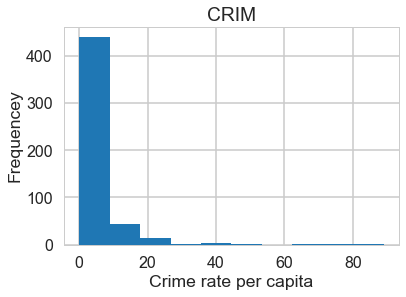

In [37]:
#your turn
# Above Histogram without log transformation
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

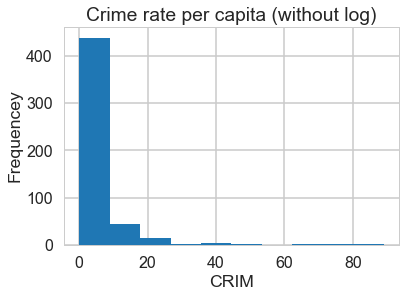

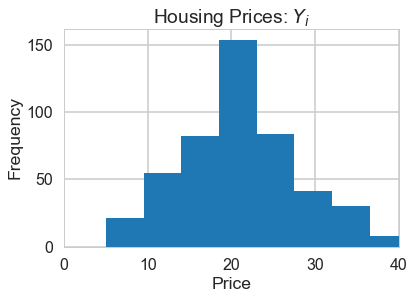

In [38]:
# Plot histogram for 'CRIM'(without taking the log)
plt.hist(bos.CRIM)
plt.title("Crime rate per capita (without log)")
plt.xlabel("CRIM")
plt.ylabel("Frequencey")
plt.show()

# Plot histogram for 'PRICE' 
plt.hist(bos.PRICE)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0,40)
plt.show()



Plot separate histograms and one for RM, one for PTRATIO. Any interesting observations?

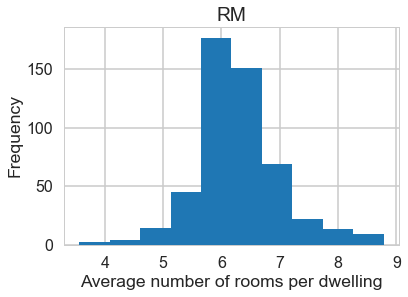

In [39]:
#your turn
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Frequency")
plt.show()

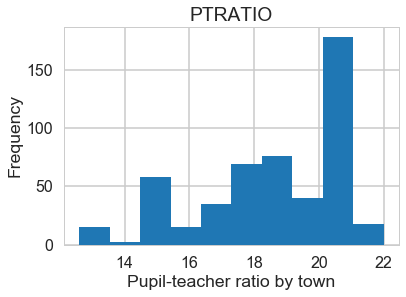

In [40]:
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Frequency")
plt.show()

The distribution is somewhat left skewed with a mean to the left

C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


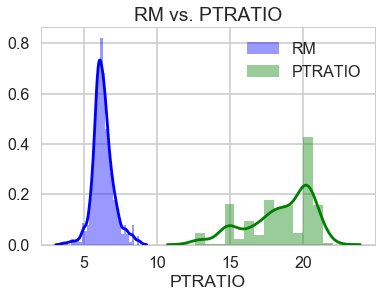

C:\Users\achow\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


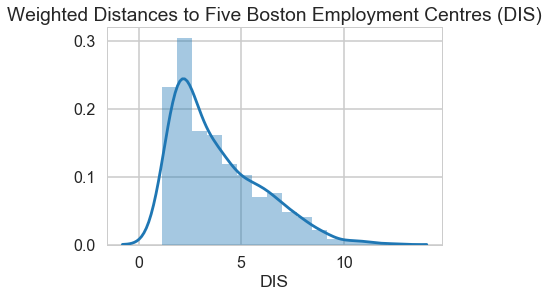

In [41]:
# Plot 'RM' and 'PTRATIO' on the same Axis
sns.distplot( bos.RM , color="blue", label="RM")
sns.distplot( bos.PTRATIO , color="green", label="PTRATIO")
plt.legend()
plt.title("RM vs. PTRATIO")
plt.show()

sns.distplot(bos.DIS)
ax.set(xlabel='DIS', ylabel='Frequency', )
plt.title("Weighted Distances to Five Boston Employment Centres (DIS)")
plt.show()



The histogram of prime per capita and frequency without the log is skewed to the right. Taking a log transformation, makes the crime rate per capita's distribution more symmetrical.

The distribution plot comparing RM and PTRATIO shows that RM is normally distributed and PTRATIO is skewed to the left. The distribution of Weighted Distances to Five Boston Employment Centres (DIS) is skewed right.

Creating a Matrix Plot for 'RM', 'PTRATIO', 'NOX', 'LSTAT'

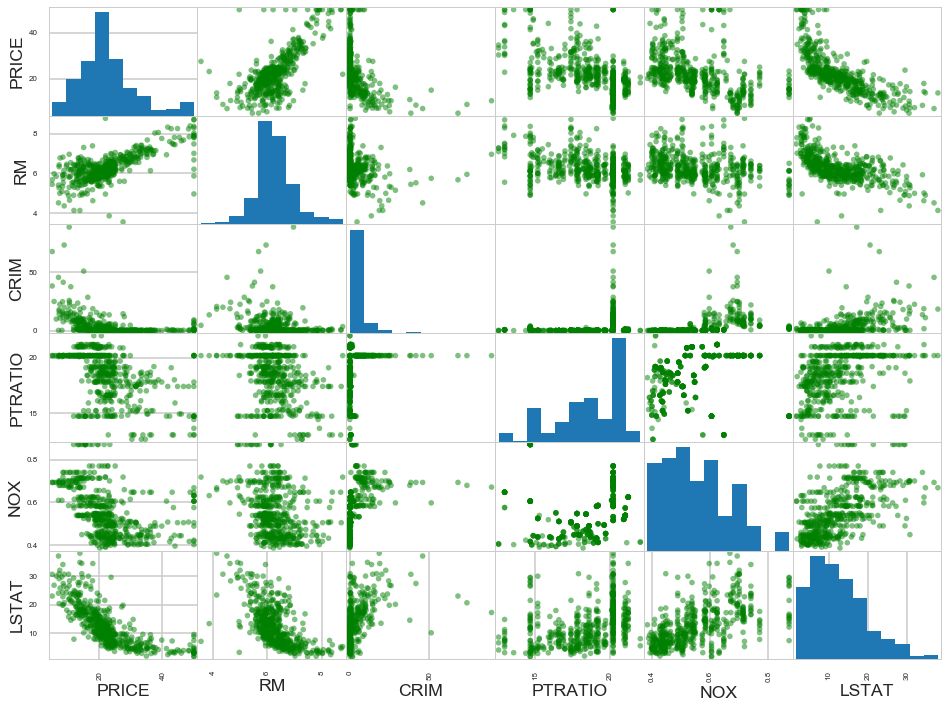

In [42]:
pd.plotting.scatter_matrix(bos[['PRICE', 'RM', 'CRIM', 'PTRATIO', 'NOX', 'LSTAT']], alpha=0.5, figsize=(16, 12), c = 'g')
plt.show()

we observe that there is a negative-linear relationship between 'RM' and 'LSTAT'.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [43]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           2.49e-74
Time:                        04:30:13   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [45]:
m = ols('PRICE ~ RM + CRIM + PTRATIO + INDUS',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.53e-99
Time:                        04:30:13   Log-Likelihood:                -1605.4
No. Observations:                 506   AIC:                             3221.
Df Residuals:                     501   BIC:                             3242.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9880      4.032     -0.245      0.8

In [46]:
m_crim = ols('PRICE ~ CRIM',bos).fit()
print(m_crim.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           2.08e-19
Time:                        04:30:13   Log-Likelihood:                -1799.5
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0162      0.409     58.676      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

In [47]:
m

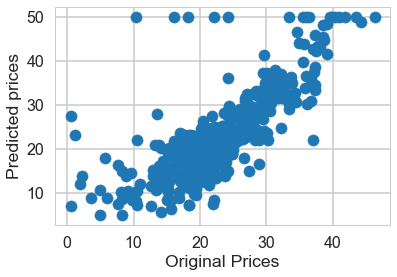

In [48]:
# your turn
fdval= m.fittedvalues 

plt.scatter(fdval, bos.PRICE)
plt.ylabel('Predicted prices')
plt.xlabel('Original Prices')
plt.show()

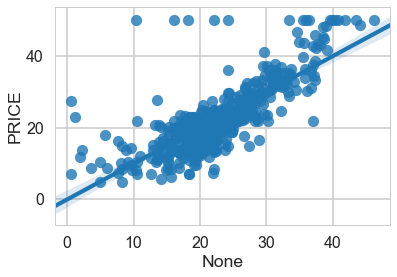

In [49]:

sns.regplot(x=fdval, y="PRICE", data=bos, fit_reg = True)

#Positively linear

In [50]:
# Calculates a Pearson correlation coefficient and the p-value 
stats.pearsonr(fdval,bos.PRICE)

(0.7776933947792583, 1.1351852772285598e-103)

There is a strong correlation between predicted & original prices and looks fairly linear. The above plot shows that Predicted Prices has a moderate positive relationship with the Original Prices such that overall, as Predicted Prices increases, the original Prices also increases.

Scatter plot shows there is a linear relationship between original and predicted prices, which is what is desired. When the original prices are high, the predicted prices too ar high, which means our predictions have good accuracy.

### Fitting Linear Regression using `sklearn`


In [51]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [52]:
# Look inside lm object
# lm.<tab>
# Look inside lm object
dir(lm)




['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

In [65]:
# Look inside lm object
#pd.DataFrame(zip(X.columns, lm.coef_), columns=['features','estimatecoefficients'])
print((X.RM, lm.coef_))

(0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64, array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.0565503

In [64]:
lm.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [63]:
lm.intercept_


36.491103280361344

In [92]:
# The coefficients
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.202110
1,ZN,7.381567
2,INDUS,-1.074187


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [62]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
lm.score(X, bos.PRICE)

0.7406077428649427

In [67]:
y = bos.PRICE
lm.predict(X)

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483,
       18.9958266 , 21.58970854, 20.90534851, 19.55535931, 19.2837957 ,
       19.30000174, 20.52889993, 16.9096749 , 16.17067411, 18.40781636,
       12.52040454, 17.67104565, 15.82934891, 13.80368317, 15.67708138,
       13.3791645 , 15.46258829, 14.69863607, 19.54518512, 20.87309945,
       11.44806825, 18.05900412,  8.78841666, 14.27882319, 13.69097132,
       23.81755469, 22.34216285, 23.11123204, 22.91494157, 31.35826216,
       34.21485385, 28.0207132 , 25.20646572, 24.61192851, 22.94438953,
       22.10150945, 20.42467417, 18.03614022,  9.10176198, 17.20856571,
       21.28259372, 23.97621248, 27.65853521, 24.0521088 , 15.35989132,
       31.14817003, 24.85878746, 33.11017111, 21.77458036, 21.08526739,
       17.87203538, 18.50881381, 23.9879809 , 22.54944098, 23.37068403,
       30.36557584, 25.53407332, 21.11758504, 17.42468223, 20.78

In [68]:
print ('Number of coefficients:', len(lm.coef_))
lm.coef_

Number of coefficients: 13


array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [69]:
print ('Estimated intercept coefficient:', lm.intercept_)


Estimated intercept coefficient: 36.491103280361344


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


How would you change the model to not fit an intercept term? Would you recommend not having an intercept?

In [70]:
# your turn
lm_no_intercept = LinearRegression(fit_intercept=False)
lm_no_intercept.fit(X, y)
print('Estimated intercept coefficient: {}'.format(lm_no_intercept.intercept_))
lm_no_intercept.score(X, y)

Estimated intercept coefficient: 0.0


0.7136639021041447

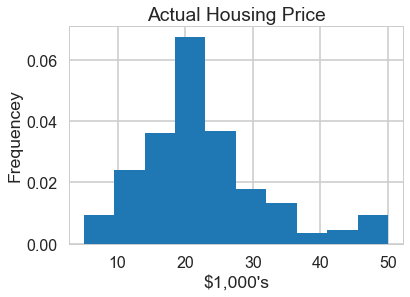

In [71]:
plt.hist(y , density=True)
plt.title("Actual Housing Price")
plt.xlabel("$1,000's")
plt.ylabel("Frequencey")
plt.show()

False, it is not a mandatory requirement that the response observations be normally distributed to utilize a linear regression model. The independent variable(s) need to be somewhat normally distributed as we are trying to find coefficients for the independent variable(s) that predict the response varaible.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [72]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280361344


In [73]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [74]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [75]:

m = ols('PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 11 Nov 2018   Prob (F-statistic):          6.95e-135
Time:                        04:38:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [76]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

In [77]:
lm.predict(X)[-5]

23.53261728511106

In [78]:
lm.predict(X)[4]

27.94288231932046

In [79]:
lm.predict(X)[6:10]

array([23.00433994, 19.5347558 , 11.51696539, 18.91981483])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

Histogram: Plot a histogram of all the predicted prices
Scatter Plot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with statsmodels before).

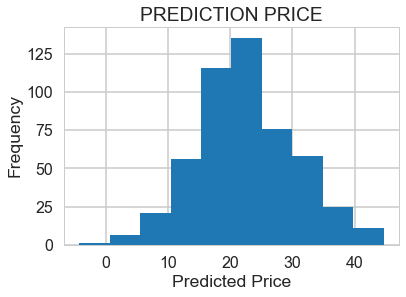

In [80]:
# your turn

plt.hist(lm.predict(X))
plt.title("PREDICTION PRICE")
plt.xlabel("Predicted Price")
plt.ylabel("Frequency")
plt.show()

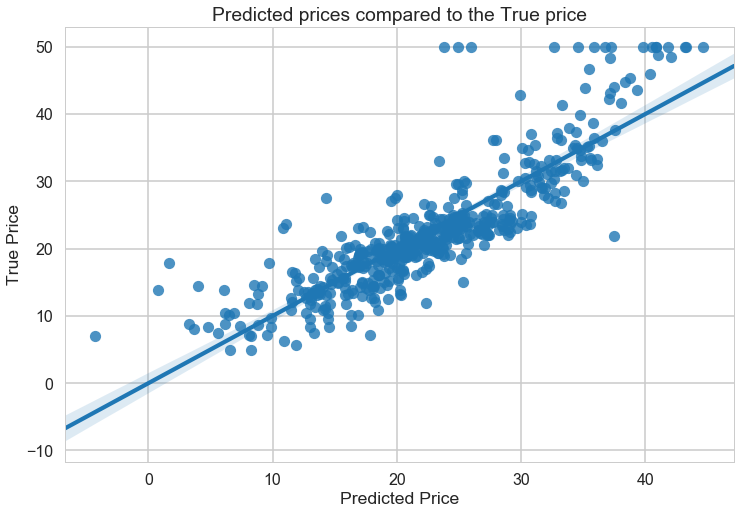

In [81]:
plt.figure(figsize = (12,8))
sns.regplot(x=lm.predict(X), y=bos['PRICE'], data=bos, fit_reg=True)
plt.title('Predicted prices compared to the True price')
plt.ylabel('True Price')
plt.xlabel('Predicted Price')
plt.show()

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [82]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149875


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [83]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

9.338093633899414e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town)

Calculate the mean squared error.

In [84]:
# your turn
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print(msePTRATIO)

62.65220001376927


We can also plot the fitted linear regression line.

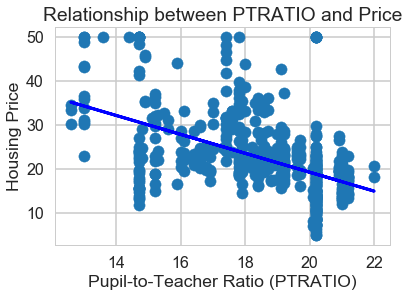

In [86]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

In [94]:
# your turn
lm_PTRATIO = LinearRegression()
lm_PTRATIO.fit(X[["PTRATIO"]], y)

print('Estimated intercept coefficient: {}'.format(lm_PTRATIO.intercept_))
print('Number of coefficients: {}'.format(len(lm_PTRATIO.coef_)))
pd.DataFrame({'features': X[["PTRATIO"]].columns, 'estimatedCoefficients': lm_PTRATIO.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: 62.34462747483265
Number of coefficients: 1


,features,estimatedCoefficients
0,PTRATIO,-2.157175


This model suggests that the base housing price starts at a high-end price of 62,345 and decreases in value by 2,157 per percentage increase in pupil-teacher ratio.

Exercise: Calculate (or extract) the $R^2$ value. What does it tell you?

In [95]:
R2 = lm_PTRATIO.score(X[["PTRATIO"]], y)
print(R2)

0.257847318009223



This linear regression model "fits" the samples with an $R^2$ value of ~0.258 which is a horrible fit and is a poor representation of the problem in predicting housing prices.

Exercise: Compute the $F$-statistic. What does it tell you?

In [96]:
N = len(X[["PTRATIO"]])
print(N)
K = len(X[["PTRATIO"]].columns)
print(K)
F_stat = (R2 / (1 - R2)) * ((N - K - 1) / K)
print(F_stat)

506
1
175.10554287569548


We reject the null hypothesis that the $\beta$ coefficient for PTRATIO is zero and accept the alternative hypothesis that there is some $\beta$ for the PTRATIO feature that does have an effect on the response variable $Y$.

Exercise: Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.

In [97]:
m2 = ols('PRICE ~ PTRATIO',bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.61e-34
Time:                        04:57:02   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [98]:
from scipy import stats

print("The p-value from the t-statistic is {0:1.2e}".format(stats.t.sf(abs(-13.233), 504) * 2))
print("The p-value from the F-statistic is {0:1.2e}".format(stats.f.sf(F_stat, 1, 504)))

The p-value from the t-statistic is 1.61e-34
The p-value from the F-statistic is 1.61e-34


The p-values for both the F-statistic and the t-statistic associated with this simple (sinlge independent variable) regression analysis are the equal to each other.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

Try fitting a linear regression model using three independent variables

'CRIM' (per capita crime rate by town)
'RM' (average number of rooms per dwelling)
'PTRATIO' (pupil-teacher ratio by town)

In [87]:
# your turn
# your turn
crp = bos[['CRIM', 'RM', 'PTRATIO']]
lm.fit(crp, bos.PRICE)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
lm.intercept_ 
print ('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -3.3066171324064797


In [89]:
#lm.coef_
print ('Number of coefficients:', len(lm.coef_))

Number of coefficients: 3


In [91]:
# The coefficients
pd.DataFrame(list(zip(crp.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.202110
1,RM,7.381567
2,PTRATIO,-1.074187


In [93]:
# your turn
threeFactorPrice=LinearRegression()
threeFactorPrice
X2=bos[["PTRATIO","CRIM","RM"]]
threeFactorPrice.fit(X2,bos.PRICE)
threeFactorPrice.predict(X2)
mse = np.mean((bos.PRICE - threeFactorPrice.predict(X2)) ** 2)
print (mse)

34.32379656468122


In [99]:
m3 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.09e-97
Time:                        05:00:28   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

Exercise: Compute or extract the $R^2$ statistic. What does it tell you about the model?

An $R^2$ value of 0.593 is suggests that this model does not "fit" the sample data that well. It suggests that this linear model is not a good representation of the actual housing prices.

Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.

The RM (average number of rooms per dwelling) input variable has a stronger relationship (higher coefficient $\hat{\beta}$) to the response variable suggesting that there is a 7,382 increase in housing price for each additional room.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [101]:
m4 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT + DIS',bos).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.5
Date:                Sun, 11 Nov 2018   Prob (F-statistic):          1.25e-126
Time:                        05:05:37   Log-Likelihood:                -1539.3
No. Observations:                 506   AIC:                             3091.
Df Residuals:                     500   BIC:                             3116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.9708      4.079      5.632      0.0

This new model with the LSTAT and DIS features added produces better results than the model with only CRIM, RM, and PTRATIO as the AIC and the p-value associated with the F-statistic are lower.

In [102]:
lm = LinearRegression()
lm_ptratio = lm.fit(X.PTRATIO.values.reshape(-1, 1), bos.PRICE)
lm_ptratio.intercept_, lm_ptratio.coef_

(62.34462747483265, array([-2.1571753]))

In [103]:
# r-square using scikit-learn
lm.score(X.PTRATIO.values.reshape(-1, 1), bos.PRICE)

0.257847318009223

In [104]:
# r-square using formulae
rss_ptratio = np.sum((bos.PRICE - lm.predict(X.PTRATIO.values.reshape(-1, 1))) ** 2)  # RSS
ess_ptratio = np.sum((lm.predict(X.PTRATIO.values.reshape(-1, 1)) - np.mean(bos.PRICE)) ** 2) # ESS
tss_ptratio = rss_ptratio + ess_ptratio
r_square_ptratio = (ess_ptratio / tss_ptratio)
print (r_square_ptratio)

0.2578473180092227



## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

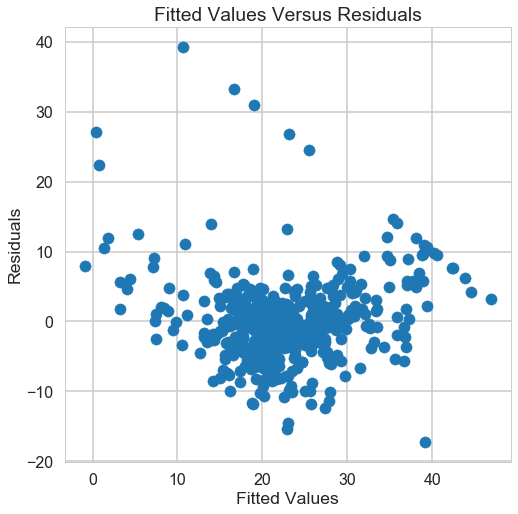

In [105]:
# Your turn.
# fitted values versus residuals plot
m2 = ols('PRICE ~  CRIM + RM + PTRATIO',bos).fit()
plt.figure(figsize = (8,8))
plt.scatter(m2.fittedvalues, m2.resid)
plt.title('Fitted Values Versus Residuals')bbbbb
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

he residuals doesn't seem "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is not reasonable.

The residuals do not form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are unequal.

some residuals "stands out" from the basic random pattern of residuals. This suggests that there are outliers.

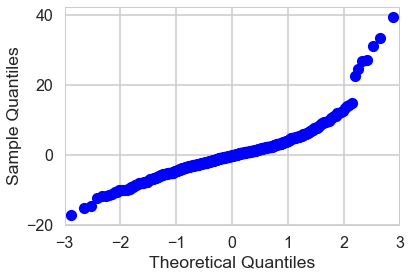

In [106]:
#quantile plot of the residuals.
sm.qqplot(m2.resid)
plt.show()

The basic idea behind any normal probability plot is if the data follow a normal distribution with mean µ and variance σ2, then a plot of the theoretical percentiles of the normal distribution versus the observed sample percentiles should be approximately linear. If the resulting normal probability plot of the residuals is approximately linear supporting the condition that the error terms are normally distributed.

But here the plot is not quite linear resulting the error terms are not normally distributed.

# advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?
Both the plots help us check the normality assumption of the residuals. QQ plot makes it visually easy to check the normality where as Residual plot gives an advantage of checking for linearity assumption.

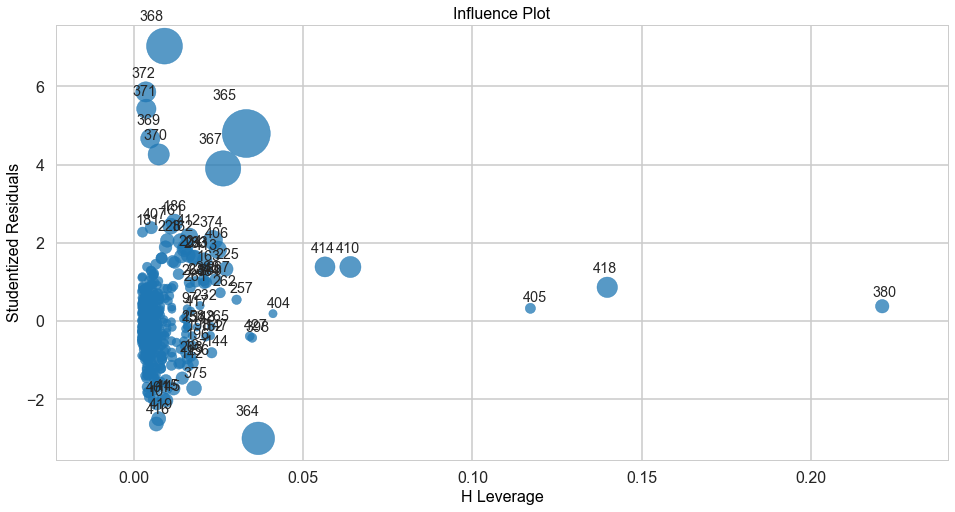

In [107]:
#leverage plot
fig, ax = plt.subplots(figsize=(16,8))
fig= sm.graphics.influence_plot(m2, ax= ax, criterion="cooks")

In the above influence plot points 405, 418, 380 are high leverage points. After observing the values of all those 3 points predictors they are quite extreme values when compared to the mean of the variable.

In [109]:
# Removing outliers & high leverage points from model.
abc = list(m2.resid[m2.resid > 20].index)+[405, 418, 380] + list(m2.resid[m2.resid < -17].index)
bos_no_outliers = bos.drop(abc, 0)
bos_no_outliers.shape

m4 = ols('PRICE ~ CRIM + RM + PTRATIO', bos_no_outliers).fit()

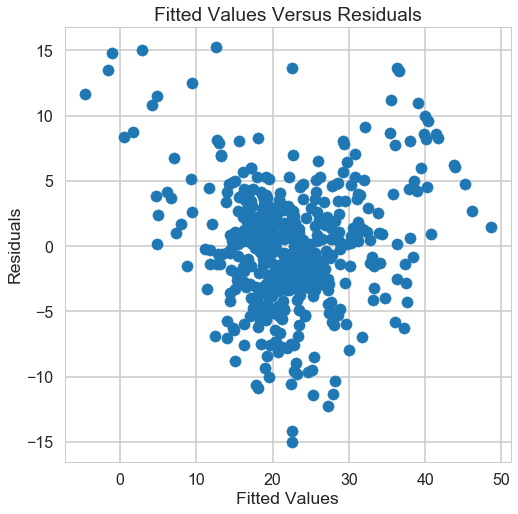

In [110]:
plt.figure(figsize = (8,8))
plt.scatter(m4.fittedvalues, m4.resid)
plt.title('Fitted Values Versus Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

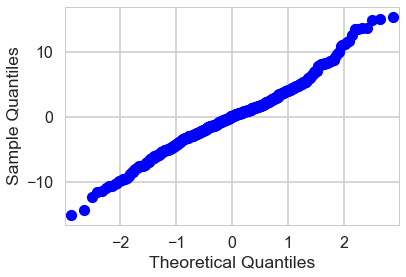

In [111]:
sm.qqplot(m4.resid)
plt.show()

After removing the outliers & high leverage points we observe from the above 2 plots that the linear relationship assumption is resonable and from the quantile plot now we can say that the errors are normally distributed.

In [118]:
# For Residual plot
# fitted values (need a constant term for intercept)
model_fitted_y = m.fittedvalues

# model residuals
model_residuals = m.resid

# absolute residuals
model_abs_resid = np.abs(model_residuals)

#--------------------------------------------------------------------------------------------------------------
# For Quantile Plot
# normalized residuals
model_norm_residuals = m.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

In [ ]:
#Residual plot



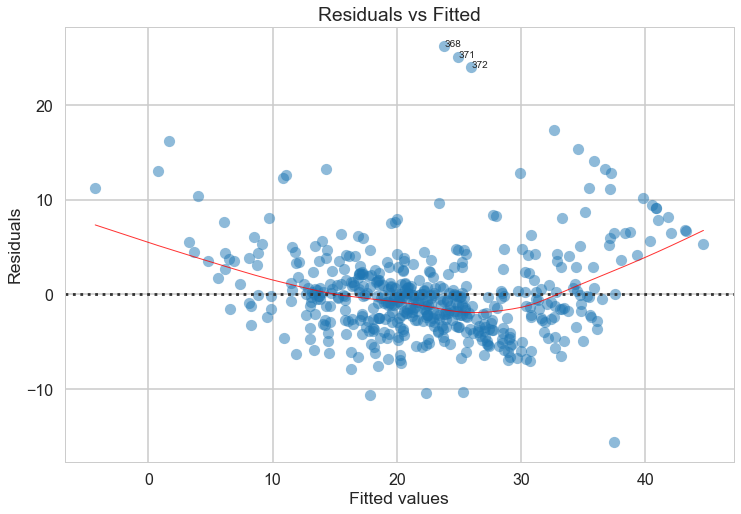

In [119]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'PRICE', data=bos, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));


The red line is non smooth and non-linear. This tells us that there is a non-linear trend to the residuals. Furthermore, the residuals dont appear to be equally variable across the entire range of fitted values. This is an indication of non-constant variance.
This violates our assumption that there is a linear relationship between predictors and target variable. When one or more of the model assumptions underlying the linear model is violated, we can no longer believe our inferential procedures.

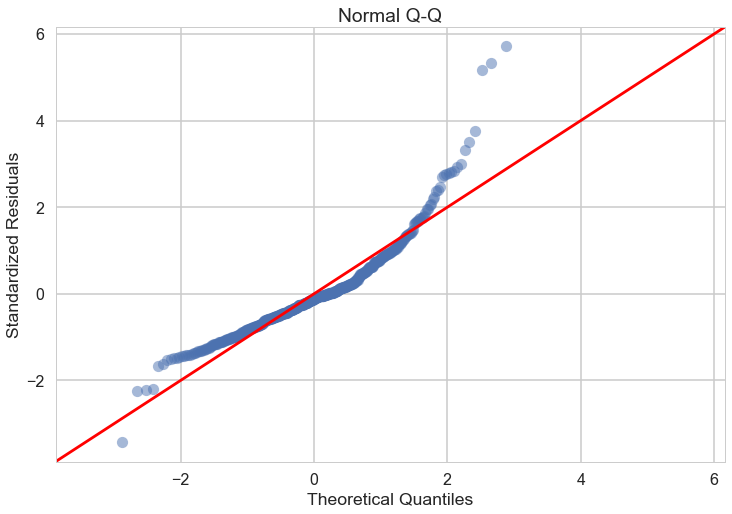

In [120]:
#Quantile plot
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

Text(0.5,1,'Predictions vs. Original Prices')

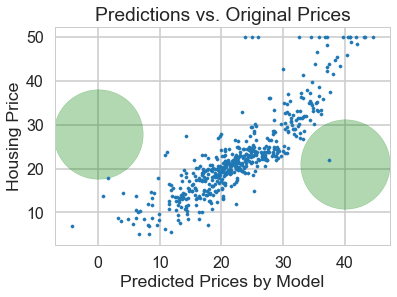

In [127]:
plt.scatter(-0, 28, s=8000, alpha=0.3, c = 'g' )
plt.scatter(40, 21, s=8000, alpha=0.3, c = 'g' )


predicted_prices = m.fittedvalues

plt.scatter(predicted_prices, bos.PRICE,s=10)

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Housing Price")
plt.title("Predictions vs. Original Prices")

Looking at the fitted values vs. prices, there are some outliers for which the model either overpredicted (left red bubble) or underpredicted (righth red bubble). This implies that the data did not fit the model well and were towns that were outliers in the original data. These towns, for whatever reason, have some combination of attributes that are not similar to the other towns. They may have higher tax rates even though there are a large percentage of lower status people, or a low PTRatio when the model predicts they should have a higher one. There are a multidude of real-world answers such as legislation and geography that could contribute to these anomalies.

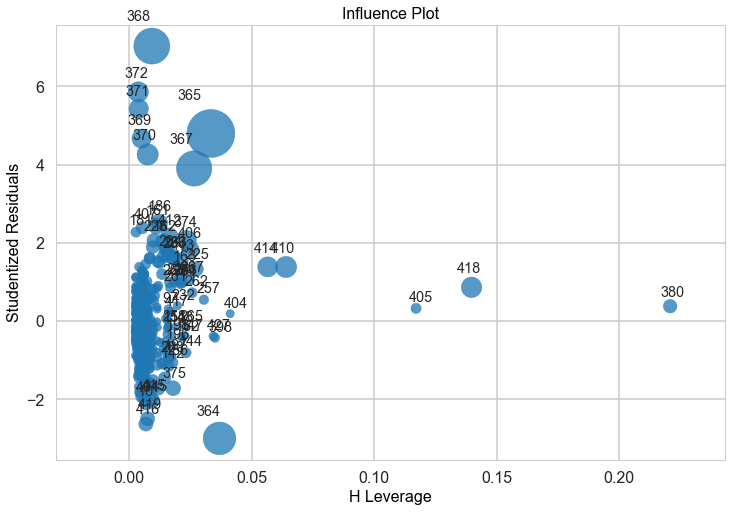

In [129]:
#Identifying high leverage points
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(m2, ax=ax, criterion="cooks")

A data point has high leverage if it has extreme predictor x values. With a single predictor, an extreme x value is simply one that is particularly high or low. With multiple predictors, extreme x values may be particularly high or low for one or more predictors, or may be "unusual" combinations of predictor values. For example, with two predictors that are positively correlated, an unusual combination of predictor values might be a high value of one predictor paired with a low value of the other predictor.

Observations 367, 365, 364 and 368 are high leverage points.

In [134]:
#Removing leverage outliers
bos['Fitted_Values'] = m2.fittedvalues
#m = ols('PRICE ~ RM',bos).fit()
#print(m.summary())

In [135]:
# Getting Index for Underpredicted Outliers# Getting 
bos[bos.Fitted_Values < 5].head(2)
# The points highlighted above graph are at 365, 367

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Fitted_Values
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,0.359783
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,0.776834


In [136]:
# Getting Index ofr Overpredicted Outliers
bos[bos.Fitted_Values > 40].tail(1)
# The point highlighted above graph are at 364

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Fitted_Values
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.885,1.0,198.0,13.6,395.52,3.16,50.0,40.565562


In [137]:
#Outliers and Leverage points to be removed:#Outliers 
bos.loc[[364,365, 367, 368]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Fitted_Values
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,39.102779
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,0.359783
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,0.776834
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,10.691218


In [138]:
#Model without Outliers#Model wi 
bos1 = bos.drop([364,365, 367, 368])
m_new = ols('PRICE ~ RM',bos1).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     646.4
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           3.84e-92
Time:                        05:52:58   Log-Likelihood:                -1614.8
No. Observations:                 502   AIC:                             3234.
Df Residuals:                     500   BIC:                             3242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.6074      2.535    -16.415      0.0

In [160]:
#Compare to the model with the outliers
m_old = ols('PRICE ~ RM',bos).fit()
print(m_old.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           2.49e-74
Time:                        06:16:32   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

P-val decreased and R^2 increased leads to better model

In [158]:
#Leverage plot
# leverage, from statsmodels internals
model_leverage = m2.get_influence().hat_matrix_diag


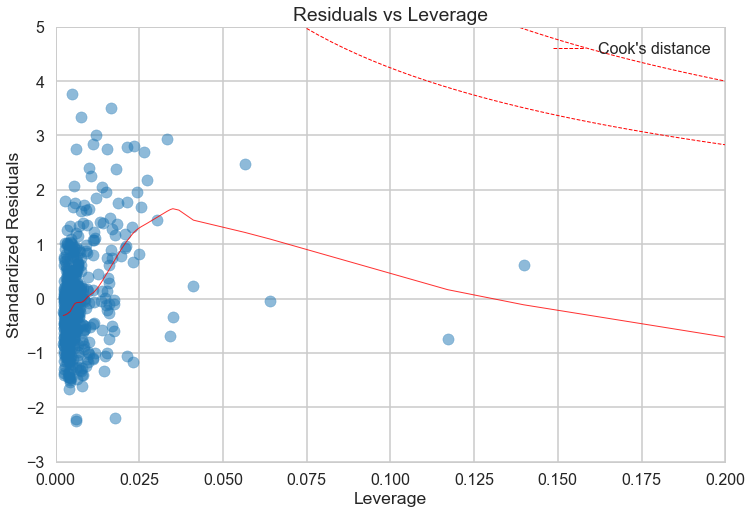

In [159]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')
    
p = len(m2.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

By removing these outliers, we have increased the R sqared value from .484 to .564 and decreased the p-value of the f-statistic significantly making the model a much better fit for the data.

In this plot we see that there are no points that have high residual and high leverage, i.e. outside of the dashed red curves.

In [162]:
X_train = X[:-50]
X_test = X[-50:]
y_train = bos.PRICE[:-50]
y_test = bos.PRICE[-50:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(456, 13)
(50, 13)
(456,)
(50,)


Another way, is to split the data into random train and test subsets using the function train_test_split in sklearn.cross_validation. Here's the documentation.

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, bos.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Your turn: Let's build a linear regression model using our new training data sets.

Fit a linear regression model to the training set
Predict the output on the test set

In [164]:
# your turn
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print(y_pred)

[37.46723562 31.39154701 27.1201962   6.46843347 33.62966737  5.67067989
 27.03946671 29.92704748 26.35661334 22.45246021 32.20504441 21.78641653
 23.41138441 33.60894362 28.28619511 15.13859055  0.30087325 18.71850376
 14.4706712  11.10823598  2.69494197 19.21693734 38.41159345 24.36936442
 31.61493439 11.42210397 24.92862188 23.31178043 22.7764079  20.65081211
 16.035198    7.07978633 17.65509209 22.81470561 29.21943405 18.61354566
 28.37701843  8.80516873 41.65140459 34.02910176 20.1868926   3.95600857
 29.69124564 12.18081256 27.19403498 30.63699231 -6.24952457 19.9462404
 21.55123979 13.36478173 20.39068171 19.87353324 23.57656877 13.40141285
 17.66457201 24.77424747 35.31476509 15.48318159 28.50764575 21.72575404
 20.58142839 26.08460856 14.51816968 32.37494056 20.80917392 12.18932524
 19.45551285 25.23390429 21.77302317 21.30227044 20.58222113 26.74635016
 17.53006166 18.7191946  19.03026793 25.76553031 21.8757557  15.70891861
 35.12411848 18.04488652 22.43612549 39.4000555  22.

Your turn:

Calculate the mean squared error

using just the test data
using just the training data
Are they pretty similar or very different? What does that mean?

In [165]:
# your turn
mseTEST1 = np.mean((y_test - lm.predict(X_test)) ** 2)
mseTEST1

28.541367275618256

In [166]:
mseTEST2 = np.mean((y_train - lm.predict(X_train)) ** 2)
print(mseTEST2)

19.546758473534663


They are different. That means we cannot necessarily generalize the trained model to out of sample data

Text(0,0.5,'Residuals')

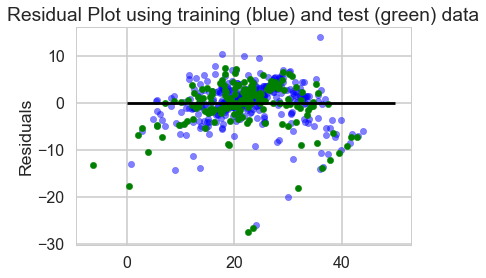

In [167]:
#Residual plots
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

our turn: Do you think this linear regression model generalizes well on the test data?

No.

K-fold Cross-validation as an extension of this idea

 Implement K-Fold cross-validation using the procedure above and Boston Housing data set using $K=4$. How does the average prediction error compare to the train-test split above?

In [169]:
from sklearn.model_selection import cross_val_score
lreg = linear_model.LinearRegression()
X = bos.drop('PRICE', axis=1)
y = bos.PRICE
print((-cross_val_score(lreg, X, y, cv=4, scoring='mean_squared_error')).mean())

42.48946952748808


C:\Users\achow\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\achow\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\achow\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\achow\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


The average prediction error is much higher for the K-fold Cross-Validation (42.49) compared to the train-test split above(28.54). This means the later is a better model because the goal of regression is minimizing the MSE as much as possible

In [170]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=4)
regr = LinearRegression()
scores = cross_val_score(regr, X, bos.PRICE, cv=kf, scoring='neg_mean_squared_error')
print(scores)

[-11.69977729 -39.0720141  -57.59307099 -61.59301573]


In [171]:
#msekfold = np.mean((Y_test - trainKFold.predict(X_test)) ** 2)
print(scores.mean())

-42.48946952748808


Now, let's try to calculate the mean squared error using "Leave One Out" method as well, to compare against the above.

In [172]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scoresLoo = cross_val_score(regr, X, bos.PRICE, cv=loo, scoring='neg_mean_squared_error')
print(scoresLoo.mean())

-23.729258081167956


In [180]:
r2_scores = cross_val_score(regr, X, bos.PRICE, cv=kf, scoring='r2')
print("R2 for kFold Split: "  + str(r2_scores.mean()))

R2 for kFold Split: 0.10998148405588931


Since mse(kFold)< mse(LeaveOneOut), we can assume that kFold is doing a better job at predicting the price for this data, compared to LeaveOneOut.

In [181]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(LinearRegression(), X, bos.PRICE, cv=4)

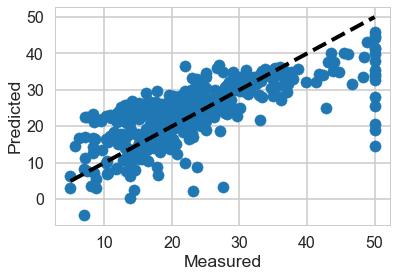

In [182]:
fig, ax = plt.subplots()
ax.scatter(bos.PRICE, predicted)
ax.plot([bos.PRICE.min(), bos.PRICE.max()], [bos.PRICE.min(), bos.PRICE.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()